In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 數據集內容

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
len(x_train),len(x_test)

(60000, 10000)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

# 一個Channel, 所以(28,28)--->(28,28,1)

In [8]:
x_train = x_train.reshape(60000,28,28,1) / 255
x_test = x_test.reshape(10000,28,28,1) / 255

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 讀入必要的函式

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Step 1. 打造函數學習機(CNN)

In [12]:
model = Sequential() #打開一個空白的函數學習機

In [13]:
model.add(Conv2D(16, (3,3), padding='same',
         input_shape=(28,28,1),
         activation='relu'))  #16個filter， 長相是3*3

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
# 輸出16個 28*28的矩陣
# 事實上是(28, 28, 16)  ###疊了16層

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
# 14,14,16 因為(2,2)，算是切了一半，行跟烈都切成一半

In [18]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu')) #第一次是16，所以這次就變成32

In [19]:
# output(14, 14, 32)

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))# output(7, 7, 32)

In [22]:
model.add(Conv2D(64, (3,3), padding='same',
                activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(54, activation='relu'))

In [26]:
model.add(Dense(10, activation='softmax'))

# 看一下我的神經網路

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0

In [28]:
model.compile(loss='mse', optimizer=SGD(lr=0.085),
             metrics=['accuracy'])

# Step 2. Fit

In [29]:
model.fit(x_train, y_train, batch_size=128, epochs=12)  #batch_size訓練了幾題後要調參數(設為128) epochs=12

Epoch 1/12
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0897 - acc: 0.1034
Epoch 2/12
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0889 - acc: 0.1649
Epoch 3/12
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0870 - acc: 0.2484
Epoch 4/12
60000/60000 [==============================] - 13s 214us/sample - loss: 0.0796 - acc: 0.4389
Epoch 5/12
60000/60000 [==============================] - 13s 217us/sample - loss: 0.0585 - acc: 0.5809
Epoch 6/12
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0463 - acc: 0.6681
Epoch 7/12
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0416 - acc: 0.6996
Epoch 8/12
60000/60000 [==============================] - 13s 219us/sample - loss: 0.0386 - acc: 0.7216
Epoch 9/12
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0364 - acc: 0.7362
Epoch 10/12
60000/60000 [==============================] - 13s 2

In [31]:
model.fit(x_train, y_train, batch_size=100, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0237 - acc: 0.8350
Epoch 2/12
60000/60000 [==============================] - 22s 368us/sample - loss: 0.0233 - acc: 0.8388
Epoch 3/12
60000/60000 [==============================] - 21s 357us/sample - loss: 0.0229 - acc: 0.8412
Epoch 4/12
60000/60000 [==============================] - 21s 346us/sample - loss: 0.0226 - acc: 0.8432
Epoch 5/12
60000/60000 [==============================] - 21s 349us/sample - loss: 0.0224 - acc: 0.8451
Epoch 6/12
60000/60000 [==============================] - 21s 353us/sample - loss: 0.0220 - acc: 0.8483
Epoch 7/12
60000/60000 [==============================] - 22s 374us/sample - loss: 0.0218 - acc: 0.8501
Epoch 8/12
60000/60000 [==============================] - 23s 380us/sample - loss: 0.0215 - acc: 0.8521
Epoch 9/12
60000/60000 [==============================] - 23s 379us/sample - loss: 0.0213 - acc: 0.8533
Epoch 10/12
60000/60000 [==============================] - 22s 3

In [32]:
#將 batch_size改成100,發現正確率變高了

# Step 3. 預測

In [33]:
result = model.predict_classes(x_test)

In [41]:
def my_predict(n):
    print('我的CNN預測是', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Blues')

我的CNN預測是 Bag


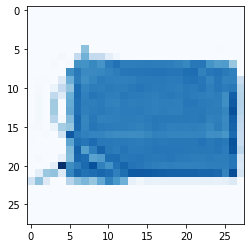

In [42]:
my_predict(18)

In [43]:
from ipywidgets import interact_manual

In [44]:
interact_manual(my_predict, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [45]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 150us/sample - loss: 0.0223 - acc: 0.8452


In [46]:
loss, acc = score

In [47]:
print('測試資料的正確率', acc)

測試資料的正確率 0.8452


# 把我的model存起來

In [48]:
model.save('myCNNmodel.h5')